In [0]:
import cv2
import dlib
import numpy as np
from imutils import face_utils
from matplotlib import pyplot as plt
import imutils
from google.colab import files
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2faces.png to 2faces.png


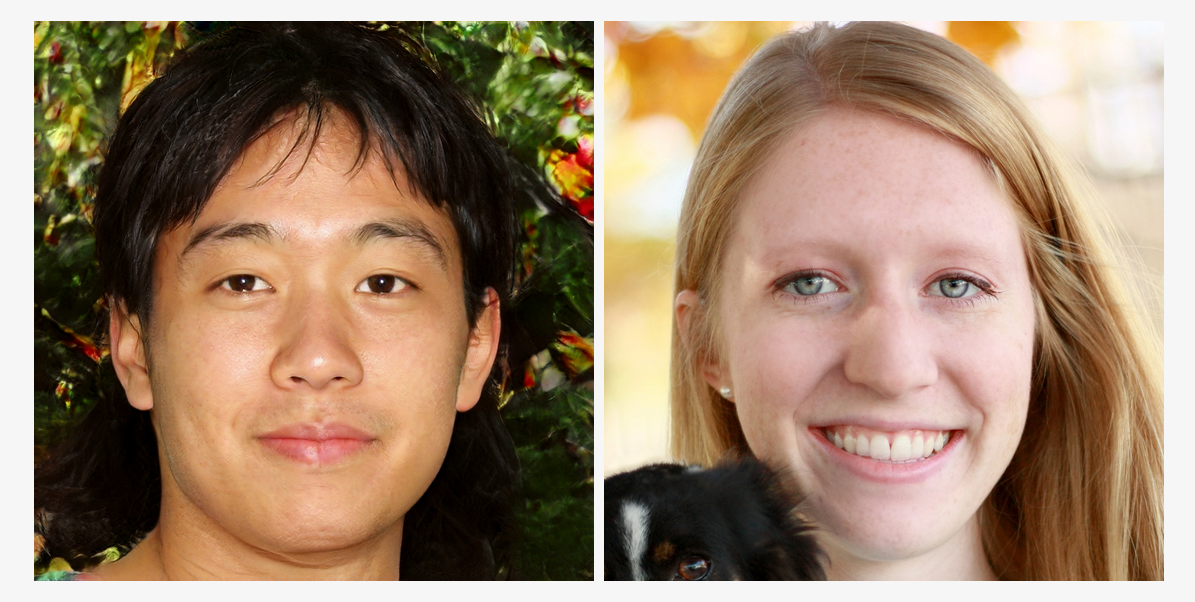

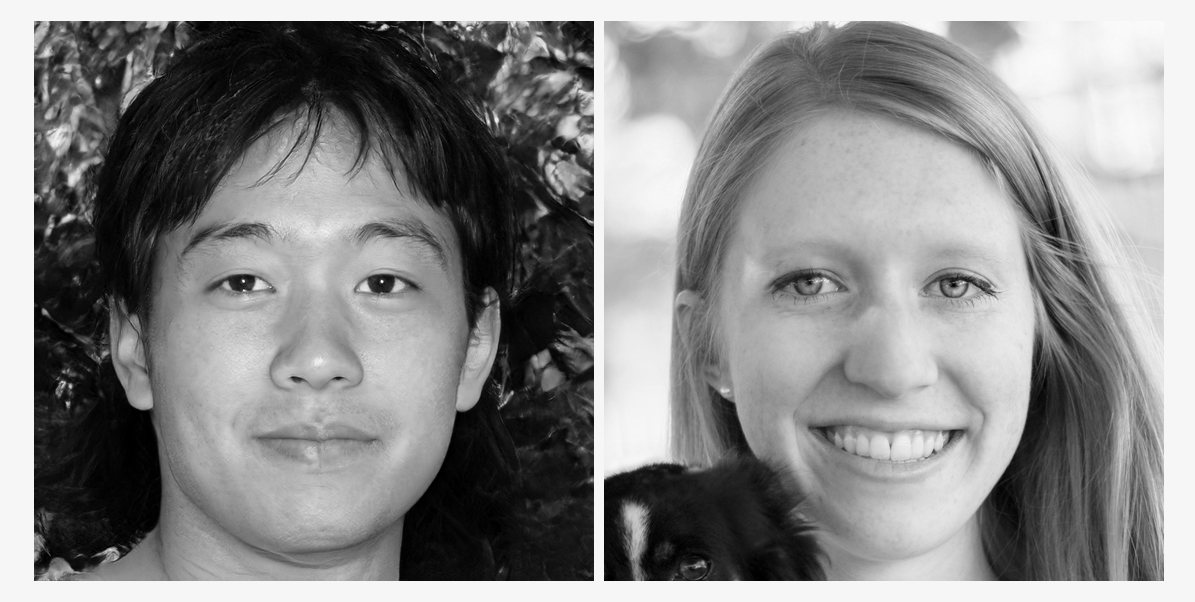

In [3]:
image = cv2.imread("2faces.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(image)
cv2_imshow(gray_image)

In [5]:
!wget https://github.com/italojs/facial-landmarks-recognition-/blob/master/shape_predictor_68_face_landmarks.dat?raw=true

--2020-03-03 06:56:06--  https://github.com/italojs/facial-landmarks-recognition-/blob/master/shape_predictor_68_face_landmarks.dat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/italojs/facial-landmarks-recognition-/raw/master/shape_predictor_68_face_landmarks.dat [following]
--2020-03-03 06:56:06--  https://github.com/italojs/facial-landmarks-recognition-/raw/master/shape_predictor_68_face_landmarks.dat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/italojs/facial-landmarks-recognition-/master/shape_predictor_68_face_landmarks.dat [following]
--2020-03-03 06:56:06--  https://raw.githubusercontent.com/italojs/facial-landmarks-recognition-/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubuserc

In [0]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat?raw=true.1")


face # 1

   Jawline

(144, 306)
(147, 349)
(151, 391)
(158, 433)
(174, 472)
(201, 503)
(235, 527)
(274, 545)
(316, 550)
(356, 544)
(390, 525)
(419, 498)
(441, 466)
(452, 428)
(458, 388)
(463, 348)
(466, 306)

   Eyebrows

(179, 259)
(199, 233)
(231, 222)
(265, 223)
(295, 235)
(339, 235)
(368, 224)
(400, 224)
(429, 236)
(444, 264)

   Nose

(319, 277)
(319, 305)
(319, 331)
(320, 359)
(285, 386)
(302, 390)
(318, 393)
(334, 390)
(350, 386)

   Left Eye

(217, 286)
(234, 276)
(254, 276)
(273, 289)
(254, 291)
(234, 291)

   Right Eye

(356, 290)
(374, 277)
(394, 277)
(411, 287)
(395, 293)
(374, 293)

   Lips

(255, 440)
(279, 430)
(303, 423)
(319, 428)
(335, 423)
(356, 431)
(377, 441)
(356, 454)
(336, 459)
(319, 461)
(302, 459)
(279, 454)
(265, 441)
(303, 442)
(319, 443)
(336, 442)
(367, 442)
(336, 438)
(319, 440)
(303, 438)

face # 2

   Jawline

(712, 287)
(715, 330)
(724, 373)
(736, 415)
(754, 455)
(785, 491)
(820, 524)
(857, 550)
(896, 557)
(932, 548)
(965, 521)
(993, 489)
(1016, 452)

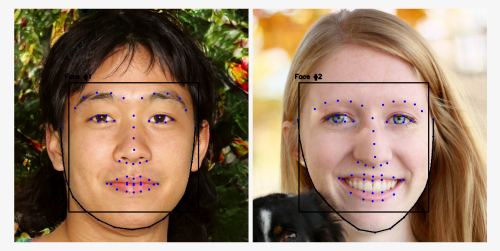

In [7]:
rect_faces = detector(gray_image)
for (k, face) in enumerate(rect_faces):
  landmarks = predictor(gray_image, face)

  (x, y, w, h) = face_utils.rect_to_bb(face)
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 0), 2)
  cv2.putText(image, "Face #{}".format(k + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
  
  print('\nface #',k+1)
  print('\n   Jawline\n')
  for i in range(0, 17):  # jawline coordinates
    cord = (landmarks.part(i).x, landmarks.part(i).y)
    print(cord)
    cv2.circle(image, cord, 1, (255, 0, 0), 2)
  
  for i in range(0,16):
    cord1 = (landmarks.part(i).x, landmarks.part(i).y)
    cord2 = (landmarks.part(i+1).x, landmarks.part(i+1).y)
    cv2.line(image, cord1, cord2, (0,0,0), 2)

  print('\n   Eyebrows\n')
  for i in range(17, 27):  # jawline coordinates
    cord = (landmarks.part(i).x, landmarks.part(i).y)
    print(cord)
    cv2.circle(image, cord, 1, (255, 0, 0), 2)

  print('\n   Nose\n')
  for i in range(27, 36):
    cord = (landmarks.part(i).x, landmarks.part(i).y)
    print(cord)
    cv2.circle(image, cord, 1, (255, 0, 0), 2)
  
  print('\n   Left Eye\n')
  for i in range(36, 42):
    cord = (landmarks.part(i).x, landmarks.part(i).y)
    print(cord)
    cv2.circle(image, cord, 1, (255, 0, 0), 2)

  print('\n   Right Eye\n')
  for i in range(42, 48):
    cord = (landmarks.part(i).x, landmarks.part(i).y)
    print(cord)
    cv2.circle(image, cord, 1, (255, 0, 0), 2)

  print('\n   Lips\n')
  for i in range(48, 68):
    cord = (landmarks.part(i).x, landmarks.part(i).y)
    print(cord)
    cv2.circle(image, cord, 1, (255, 0, 0), 2)

image = imutils.resize(image, width=500, height = 500)
cv2_imshow(image)

In [0]:
cv2.imwrite('detected_results.png',image)
files.download("detected_results.png")